# Random walk and CLT

:::{admonition} What you need to know

- Summing independent random variables creates another random variable that could be used to compute means and variances in the sample.
- The Law of Large Numbers is a principle that states that as the number of observations increases, the average of the results will get closer to the expected value, meaning that more data leads to more accurate outcomes.
- The Central Limit Theorem (CLT) tells us that if you take a lot of samples from any kind of population and look at the average of those samples, those averages will tend to form a normal distribution, even if the original population is not shaped that way.
- In chemistry and physics, a random walk model describes the erratic, unpredictable motion of atoms and molecules, providing a fundamental model for diffusion processes, molecular motion in fluids, and the propagation of light in disordered media.
- Learn to simulate random walk and diffusive processes using python
:::

In [33]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

### Sum of random variables

- Consider a sequence $X_1, X_2, \ldots$ of **i.i.d. (independent identically distributed)** random variables. 
- The sum of n terms $S_n$ is called a **sample sum** and is also a random variable. Similarly, one can define a sample mean $M_n =S_n/n$

$$S_n = \sum_{i=1}^n X_i$$

- Each of the $X_i$ has the same mean $\mu = E(X_1)$ and variance $\sigma^2 = V(X_1)$.  

- Because we are dealing with **independent random variables**, the variance and the expectation of sample sum are a linear function of $n$ number of steps. In other words, no cross-terms survive averaging. 

$$E\left(S_n\right) = \sum_{i=1}^n E\left(X_i\right) = n \mu$$

$$V\left(S_n\right) =  \sum_i \sum_j E\big[(X_i-E(x))\cdot (X_j-E(x))\big]=  \sum_i E\big[(X_i-E(x))^2\big] =\sum_{i=1}^n V\left(X_i\right) = n \sigma^2$$

- The sample mean converges to the exact mean with variance growing down as $n^{-1/2}$. This is known **Law of Large Numbers (LLN)** 

$$\boxed{\frac{V(S_n)^{1/2}}{E(S_n)} = \frac{1}{n^{1/2}}\frac{\sigma}{\mu }}$$

In [32]:
def simple_test_lln(n):
    
    S = np.random.randn(n)
    
    return np.std(S)/(n * np.mean(S))

simple_test_lln(10)

0.24403624529395723

### The Central Limit Theorem  (CLT)

- Let $X_1, X_2, \ldots $ be a sequence of i.i.d. random variables with common mean $\mu$ and variance $\sigma^2$. 

- We scale our random variables to make them **de-meaned** and **scaled** sample mean to make $Z_n$ have 0 mean and 1 variance.

$$Z_n = \frac{S_n - n\mu}{\sigma \sqrt{n}}$$

- **Central Limit Theorem** asserts that the probability distribution function or **PDF** of $p_Z(z)$ converges to the standard normal distribution in the limit of large number of n steps:

$$p_Z\left(z\right) \rightarrow \frac{1}{\sqrt{2\pi}}  e^{-z^2/2}$$

- There is an implicit assumption that the **mean and variance**, $\mu$ and $\sigma^2$, **are finite**. Thus, CLT does not hold for certain power-law distributed RVs.

### Simulating a 1D unbiased random walk 

- Each random walker will be modeled by a random variable $X_i$, assuming +1 or -1 values at every step. We will run N random walkers (rows) over n steps (columns)
- We then take **cumulative sum  over n steps** thereby summing n random variables for N walkers. This will be done via a convenient ```np.cumsum()``` method.


In [7]:
def rw_1d(n, N):
    '''
    n: Number of steps
    N: Number of walkers
    returns np.array with shape (n, N) 
    '''
    
    # Create random walks 
    r  = np.random.choice([-1,1], size=(n, N))
    
    #Sum over n steps
    rw = r.cumsum(axis=0)

    #Set initial position 
    rw[0,:]=0 
    
    return rw

In [8]:
rw = rw_1d(2000, 1000)

print(rw.shape)

(2000, 1000)


In [5]:
# Simulate 1D random walk
n_max = 1000
N     = 1000 
rw    = rw_1d(n_max, N)

def rw_plotter(t=1):
    
    fig, ax = plt.subplots(nrows=2)

    ax[0].plot(rw)
    ax[0].axvline(x=t, color='black', linestyle='-', lw=2)
    ax[1].hist(rw[t, :], color='orange', density=True, label=f'time={t}')

    ## Plot gaussian with width t**0.5
    x = np.linspace(-100,100, 1000)
    y = stats.norm.pdf(x, 0, np.sqrt(t))
    ax[1].plot(x,y, color='black', lw=2, label=f'std={np.sqrt(t):.2f}')  

    ax[0].set_ylabel('Position')
    ax[0].set_title('RW trajectries');

    ax[1].set_xlabel('Position')
    ax[1].set_ylabel('Histogram')
    ax[1].set_xlim([-100, 100])
    ax[1].legend()
    fig.tight_layout()

### 2D random walk

In [ ]:
def rw_2d(n, N):
    '''2d random walk function:
    n: Number of steps
    N: Number of trajecotry
    returns np.array with shape (T, N)
    '''
    verteces = np.array([(1,  0),
                         (0,  1),
                         (-1, 0),
                         (0, -1)])
    
    rw       = verteces[choice([0,1,2,3], size=(T, N))]
    
    rw[0, :, :] = 0
    
    return rw.cumsum(axis=0)

In [ ]:
traj = rw_2d(n=10000, N=1000)

In [ ]:
#Simulate 2D random walk
n, N = 10000, 1000
traj = rw_2d(n, N)

#Compute RSD 
dx = (traj[:, :, 0]- traj[0, :, 0]) 
dy = (traj[:, :, 1]- traj[0, :, 1]) 

R2     = np.mean(dx**2 + dy**2, axis = 1)   # notice how we averaging over N

fig, ax  = plt.subplots(nrows=2, figsize=(10,10))

t = np.arange(n) # time axis
ax[1].loglog(t, np.sqrt(R2), lw=3, alpha=0.5);
ax[1].loglog(t, np.sqrt(t), '--');

ax[0].set_title('2D random walker',fontsize=15)
ax[0].plot(traj[:3000, :5, 0], traj[:3000, :5, 1]);
ax[0].set_xlabel('X')
ax[1].set_xlabel('Y')

ax[1].set_xlabel('Number of steps, n',fontsize=15)
ax[1].set_ylabel(r'$MSD(n)$',fontsize=15);

### Mean square displacement (MSD) of a random walker

- After time n number of steps (or time t) how far has random walker moved from the origin?

$$Z_n = \sum^{n-1}_{i=0}X_n$$

- We quantify this by computing **Mean Square Displacement (MSD)**. Note that the mean is computed over N number of simulated trajectories (ensemble average). Invoking central limit theorem, or simply realizing that off diagonal terms drop off we end up with expected 1/2 saling with steps.

$$
MSD(n)= \Big\langle \big ( Z_n - Z_0 \big)^2 \Big \rangle \sim n^{1/2}
$$

### Mean square displacement (MSD) and Diffusion

- Einstein developed a theory of diffusion based on random walk ideas and obtained a key equation relating mean square displacement of particle in d dimensions to time $(t = n \Delta t)$.

- Consider recording n number of positions for a particle in solution starting from origin $r_0=0$

$$R_n = \sum^{n}_{i=0} r_i$$

- Repeating experiment N number of times we can compute ensemble average

$$\langle R^2_n\rangle = \sum_i \sum_j \langle r_i r_j \rangle = \sum_i \langle r^2_i \rangle = \sum_i d \cdot \langle \delta x^2_i \rangle =  d \cdot n \cdot  \delta x^2$$

- Where we decomposed displacement in d independent dimensions. Write number of steps in terms of time increments $n=t/\delta t$ we get:

$$\langle R^2_n\rangle =  d \cdot \frac{t}{\delta t}  \cdot \delta x^2$$

- Grouping constants together we defined the diffusion coefficient:

$$\langle R^2 (t) \rangle = 2d  \cdot  D \cdot t$$


$$D = \frac{\langle \delta x^2 \rangle}{2\delta t}$$

- We end up with a general expression for a mean square displacement as a function of time. Any motion which adheres to this scaling with time will be called **diffusive**. 

$$MSD(t) = 2d D \cdot t^{1/2}$$

In [ ]:
n, N = 2000, 1000
rw = rw_1d(n, N)

t = np.arange(n)

R2 = (rw[:, :] - rw[0, :])**2 # Notice we subtract initial time

msd =  np.mean(R2, axis=1)    # Notice we average over N

plt.loglog(t, np.sqrt(msd), lw=3) 

plt.loglog(t, np.sqrt(t), '--')

plt.title('Compute mean square deviation of 1D random walker',fontsize=15)
plt.xlabel('Number of steps, n',fontsize=15)
plt.ylabel(r'$MSD(n)$',fontsize=15);

### Brownian motion

- The Brownian motion  describes the movement of a particle suspended in a fluid resulting from random collisions with the quick molecules in the fluid (diffusion). 

- A small particle undergoes many molecular collisions when going from one step to another or after $dt$ time. As a result, each displacement over time $dt$ can be viewed as a sum of random collisions, which can be approximated by a normal distribution via the Central Limit Theorem.

- Thus, to simulate Brownian motion, we draw random displacements from normal distribution. 

$$x(t+dt)-x(t)=N(0,\sqrt{2D dt})$$ 

We assume we have started at position $\mu=0$, and our variance is given by $\sigma^2=2Dt$, Where D is the diffusion coefficient, which is related to the parameters of the discrete random walk as shown in the lecture.  

$$x(t+dt)=x(t)+\sqrt{2D dt} \cdot N(0,1)$$ 

In the last step, we re-wrote Brownian motion equation in a convenient way by shifting the normally distributed random variable by $\mu$ and scaling it by $\sigma$ 

$$N(\mu, \sigma^2) = \mu + \sigma N(0,1) $$

In [34]:
def brown(T, N, dt=1, D=1):
    
    """
    Creates 3D brownian path given:
    time T 
    N=1 trajecotires
    dt=1 timestep
    D=1 diffusion coeff
    returns np.array with shape (N, T, 3)
    """
    
    n = int(T/dt) # how many points to sample
    
    dR = np.sqrt(2*D*dt) * np.random.randn(N, n, 3) # 3D position of brownian particle
    
    R = np.cumsum(dR, axis=1) # accumulated 3D position of brownian particle
    
    return R

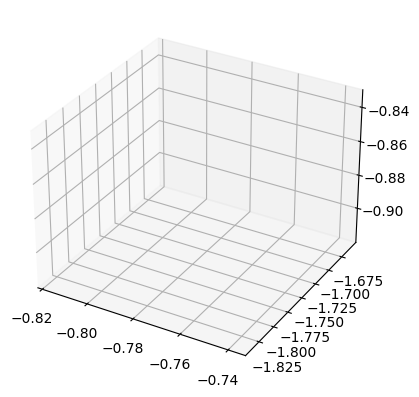

In [39]:
# Generate Brownian motion data
T = 100 # Total time
N = 1 # Number of trajectories
dt = 1 # Time step
D = 1 # Diffusion coefficient
R = brown(T, N, dt, D)[0] # Using [0] to get the first trajectory

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
line, = ax.plot(R[0:1,0], R[0:1,1], R[0:1,2], 'r-') # Initial plot

def update(num, R, line):
    line.set_data(R[:num, 0], R[:num, 1])
    line.set_3d_properties(R[:num, 2])
    return line,

from matplotlib.animation import FuncAnimation
ani = FuncAnimation(fig, update, frames=len(R), fargs=(R, line), blit=False)
ani

```{admonition} Appendix A: Stitrling's approximation of N!
:class: tip, dropdown

**Stirling's approximation**

- This is the crude version of Stirling approximation that works out for $N\gg 1$

$$logN! \approx \sum log N_i = \int log N dN$$

$$\boxed{logN! \approx NlogN-N}$$

$$\boxed{N! \approx N^N e^{-N}}$$

A more accurate version is:

$$\boxed{N! \approx N^N e^{-N} \sqrt{2\pi N}}$$

**Applying Stirling approximation to the Binomial**

$$N = N_1+N_2$$ 

$$\frac{N!}{N_1! \cdot N_2!} \approx \frac{N^N e^{-N}}{N_1^{N_1} e^{-N_1}\cdot N_2^{N_2} e^{-N_2}} =\frac{N^N } {N_1^{N_1} \cdot N_2^{N_2} }$$

$$log\frac{N!}{N_1! \cdot N_2!} \approx NlogN -N_1 log N_1 - N_2log N_2 = \\ = N \Big[ -\frac{N_1}{N} lo\frac {N_1}{N} - \frac{N_2}{N} log \frac{N_2}{N} \Big] = N[-p_1 log p_1 -p_2log p_2]$$

- The expression $S =  \sum_i -p_i log p_i$ will be identified with Entropy in later sections. 

**Gamma function: generalizing the factorial**

$$\Gamma (n) = \int^{\infty}_0 x^{n-1} e^{-x}dx$$

- The gamma function $\Gamma(n)$ provides an extension of the factorial function to domain of noninteger and    complex numbers. 
- The gamma function is defined for all complex numbers except the non-positive integers. 
- For any positive integer gamma function reduces to factorials

$$\Gamma(n)=(n-1)!$$
```

```{admonition} Appendix B. Gaussian approximation to the Binomial Distribution in the large $N$ limit.
:class: tip, dropdown  

Binomial distribution for large values of $N$ has a sharply peaked distribution around its maximum (most likely) value $\bar{n}$. This motivates us to seek a continuous approximation by Taylor expanding probability distribution around its max value $\Delta n = n-\bar{n}$ and keeping up to quadratic terms.

$$P_N(n) = \frac{N!}{n! (N-n)!} p^n (1-p)^{(N-n)}$$

Thus from the onset we are aiming for a Gaussian distribution. The task then is to find coefficients and to then justify that third term of Taylor expansion is negligible compared to the second!

$$logP(n) = logP(\bar{n}) + \frac{1}{2}B_2\Delta n^2 + O(\delta n^3)$$

$$log P(n) = log N! - log n! - log(N-n)! + nlog(p) + (N-n)log(1-p)$$

We evaluate derivative of $logn!$ in the limit of $n\gg1$ as: 

$$\frac{d}{dn} log n! = \frac{log(n+1)! - log n!}{n+1-n} \approx log(n+1) \approx log(n)$$

- We could also arrive at the same result by using Stirling approximation $logN! \approx  NlogN -n$
- Taking first derivative of Taylor expansion to Binomial we find the peak of the distribution around which we are making expansion:

$$\frac{d}{dn}log P(n) \Big |_{n=\bar{n}} = - log n + log(n-n) + log(p)  -log(1-p)=0$$

$$log \Big( \frac{N-n}{n} \frac{p}{1-p}\Big)=0\,\, \rightarrow \,\, \bar{n} = Np$$

- We recall that $\bar{n} = Np$ is also mean of the binomial! 
- Having found the peak of distribution and knowing first derivative we now proceed to compute the second derivative:

$$B_2 = \frac{d^2}{d n^2} logP(n) \Big |_{n = \bar{n}} = \frac{d}{dn} log \Big( \frac{N-n}{n} \frac{p}{1-p}\Big) \\ = \Big( - \frac{1}{N-n}-\frac{1}{n} \Big) \Big |_{n = \bar{n}} = - \frac{1}{Npq}$$

- While first derivative gave us the mean of binomial we notice that second derivative produces the variance $\sigma^2 = Npq$
- Now all that remains to do is to plug  the coefficients into our approximated probability distribution and then normalize it. Why normalize? After all Binomial was already properly normalized.  But since we made approximation by leaving our some terms we have to re-normalize again!

$$P(n) \approx P(\bar{n}) e^{-(n-\bar{n})^2/ 2Npq}$$

- Normalizing gaussian distribution is done via the following table integral

$$\int^{+\infty}_{-\infty} e^{-ax^2} = \Big(\frac{\pi}{a} \Big)^{1/2}$$

$$\int P(\bar{n}) e^{-(n-\bar{n})^2/ 2Npq} dn  = P(\bar{n}) (2\pi Npq)^{1/2}=1$$

- At last we have the normalized approximation to Binomial which is a guassian distribution arond mean!

$$P(n) \approx \frac{1}{(2\pi Npq)^{1/2}} e^{-(n-\bar{n})^2/ 2Npq} = \frac{1}{(2\pi \sigma^2)^{1/2}}e^{(n-\mu)^2/2\sigma^2}$$

**An Alternative derivation of Gaussian from Binomial making use of Stirling's approximation**

Here we would like to start by choosing as a new independent variable the net right displacement of a random walker $m$  

- $m = n - (N-n) = 2n-N$. 
- Hence the number of moves to the right and left are  $n = \frac{N+m}{2}$ and  $(N - n)=\frac{N-m}{2}$ respectively.
- The left and right moves sum to the total move number $\frac{N-m}{2} + \frac{N-m}{2} = N$
- Let us also assume $p = 1/2$ for the sake of simplicity.

$$P_N(m) = \frac{N!}{(\frac{N+m}{2})! \cdot (\frac{N-m}{2})!} \frac{1}{2^N}$$

- Now we make use of Stirling approximation  valid for $N\gg1$ $N! = N^N e^N$. and start group with common exponents containing N and m respectively. 

$$P_N(m) \approx \frac{N^N e^N}{ (N-m)^{(N-m)/2} (N+m)^{(N+m)/2}  \cdot 2^{-N} e^N } \cdot \frac{1}{2^N}  \\ = \frac{N^N}{ (N-m)^{(N-m)/2} (N+m)^{(N+m)/2}} \\ = \frac{N^N}{ (N-m)^{N/2} (N+m)^{N/2}} \cdot  \Big( \frac{N-m}{N+m}\Big)^{m/2} \\ = \frac{1}{[(1-m/N)(1+m/N)]^{N/2}} \cdot  \Big( \frac{N-m}{N+m}\Big)^{m/2} \\ = \Big[(1-m^2/N^2) \Big]^{-N/2} \Big( \frac{1-m/N}{1+m/N}\Big)^{m/2}  \approx (e^{-m^2/N^2})^{-N/2} (e^{-m/N})^{m/2} (e^{+m/N})^{-m/2} = e^{-m^2/2N}$$

- Notice how factors involving $2^N$ and $e^N$ cancell in the first line.
- We have casted all terms in terms of $m/N$. This allowed us to make use of $(1\pm x)\approx e^{\pm x}$ approximation for small $x$. 
```


```{admonition} Appendix C. Deriving Poisson distribution from Binomial 
:class: tip, dropdown 

**Consider the limit of large $N$ and small $p$ such that $Np=const$**

- This is a situation of rare events like rains in forest or radioactive decay of uranium where each individual event has small chance of happening $p \rightarrow 0$  yet there are large number of samples $N\rightarrow \infty$ such that one has a constant average rate of events $\lambda = pN = const$
- In this limit distirbution is no longer well described by the gaussian as the shape of distribution is heavily skewed due to tiny values of p.

$$P_N(n) = \frac{N!}{n! (N-n)!} p^n (1-p)^{(N-n)}$$

- Writing factorial $N!/(N-n)!$ explicitely we realize that it is dominated $N^n$ and also $N-n \approx N$

$$P_N(n) = \frac{N(N-1)...(N-1+1))}{n!} p^n (1-p)^{(N-n)} \approx \frac{N^n}{n!} p^n (1-p)^{N}$$

- Next let us plug in $\lambda = pN = const$ and recall the definition of exponential $lim_{x\rightarrow \infty }(1-1/x)^x = e^{-x}$

$$P(n) = \frac{N^n}{n!} \Big( \frac{\lambda}{N} \Big)^n \Big( 1-\frac{\lambda}{N} \Big)^{N} = \frac{\lambda^n}{n!} \Big( 1-\frac{\lambda}{N} \Big)^{N} \approx \frac{\lambda^n}{n!} e^{-\lambda}$$
```

### Problems



####  Confined diffusion.
Simulate 2D random walk in a circular confinement. Re-write 2D random walk  code to simulate diffusion of a particle which is stuck inside a sphere. 
Study how root mean square deviation of position scales with time. 
- Carry out simulations for different confinement sizes. 
- Make plots of simulated trajectories.

#### Return to the origin!

- Simulate random walk in 1D and 2D for a different number of steps $N=10, 10^2,10^3, 10^4, 10^5$
- Compute average number of returns to the origin $\langle n_{orig} \rangle$. That is number of times a random walker returns to the origin $0$ for 1D  or (0,0)$ for 2D . You may want to use some 1000 trajectories to obtain average. 
- Plot how $\langle n_{orig} \rangle$ depends on number of steps N for 1D and 2D walker.


####  Breaking the CLT; Cauchy vs Normal random walk in 2D

For this problem we are going to simulate two kinds of random walks in continuum space (not lattice): Levy flights and Normal distributd random walk. 

To simulate a 2D continuum space random walk we need to generate random step sizes $r_x$, $r_y$. 
Also you will need unifrom random namber to sample angles in 2D giving you a conitnuum random walk in 2D space: $x = r_x sin\theta$ and $y=r_ycos\theta$

- Normally: $r\sim N(0,1)$
- Cauchy distribution (long tails, infinite variance) $r\sim Cauchy(0,1)$
- Unform angles $\theta \sim U(0,1)$

Visualize random walk using matplotlib and study statistics of random walkers the way that is done for normal random walk/brownian motion examples!

#### (Optional Problem) Continuous time random walk (CTRW)

Simulate 1D random walk but instead of picking times at regular intervals pick them from  exponential distribution. <br>
Hint: you may want to use random variables from scipy.stats.exp <br>

[scipy.stats.expon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html) <br>

Study the root mean square deviation as a function of exponential decay parameter $\lambda$ of exponential distribution $e^{-\lambda x}$. 

## References

**The mighty little books**
-  ["Random Walks in Biology",  H Berg (1993)](https://www.amazon.com/Random-Walks-Biology-Howard-Berg/dp/0691000646)
-  ["Physical models of Living systems",  P Nelson (2015)](https://www.amazon.com/gp/product/1464140294/ref=ppx_yo_dt_b_search_asin_title?ie=UTF8&psc=1)

**More in depth**
 - ["Simple Brownian Diffusion: An Introduction to the Standard Theoretical Models", D Gillespie](https://www.amazon.com/Simple-Brownian-Diffusion-Introduction-Theoretical/dp/0199664501/ref=sr_1_1?keywords=diffusion+brownian&qid=1579882520&sr=8-1)
 - ["Stochastic Processes for Physicists" K Jacobs](https://www.amazon.com/Stochastic-Processes-Physicists-Understanding-Systems/dp/0521765420/ref=sr_1_1?keywords=kurt+jacobs+stochastic&qid=1579882738&sr=8-1)
 
**On the applied side**
- [Brownian Motion: Elements of Colloid Dynamics A P Philipse (2018)](https://www.amazon.com/Brownian-Motion-Elements-Dynamics-Undergraduate/dp/3319980521/ref=sr_1_7?keywords=einstein+brownian&qid=1579882356&sr=8-7)